In [1]:
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [2]:
# Loading csv file to Notebook
original_data = "../Resources/highest_earning_players.csv"
data = pd.read_csv(original_data)
data

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,3883,Peter,Rasmussen,dupreeh,dk,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter
1,3679,Andreas,Højsleth,Xyp9x,dk,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter
2,3885,Nicolai,Reedtz,dev1ce,dk,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter
3,3672,Lukas,Rossander,gla1ve,dk,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter
4,17800,Emil,Reif,Magisk,dk,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter
...,...,...,...,...,...,...,...,...
995,7400,Janne,Mikkonen,Savjz,fi,50734.44,Hearthstone,Collectible Card Game
996,3255,Drew,Biessener,Tidesoftime,us,50449.60,Hearthstone,Collectible Card Game
997,49164,Simone,Liguori,Leta,it,49300.00,Hearthstone,Collectible Card Game
998,43043,Mike,Eichner,Ike,us,48550.00,Hearthstone,Collectible Card Game


In [3]:
# Finding mean earnings
data["TotalUSDPrize"].mean()

397793.2164100004

In [4]:
# Finding top 10 players by total earnings
player_sorted = data[["NameFirst", "TotalUSDPrize"]].sort_values("TotalUSDPrize", ascending=False)
player_sorted = player_sorted[0:10]
player_sorted

,NameFirst,TotalUSDPrize
100,Johan,6952596.58
101,Jesse,6470000.02
102,Anathan,6000411.96
103,Sébastien,5554297.41
104,Topias,5470902.57
105,Kuro,5193382.81
106,Amer,4798043.68
107,Ivan,4579118.16
108,Maroun,4193412.69
109,Lasse,3765369.04


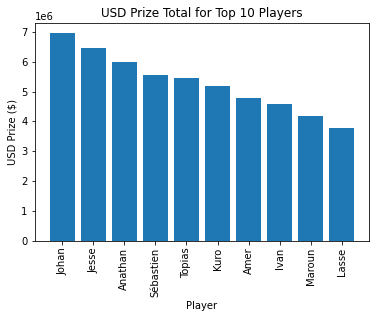

In [5]:
# Graphing player earnings
plt.bar(player_sorted["NameFirst"], player_sorted["TotalUSDPrize"], align = "center")
plt.title("USD Prize Total for Top 10 Players")
plt.ylabel("USD Prize ($)")
plt.xlabel("Player")
plt.xticks(rotation=90)
plt.savefig('../Figures/top_players.png')
plt.show()

In [6]:
# Checking for duplicate ID's
pd.concat(g for _, g in data.groupby("PlayerId") if len(g) > 1)

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
595,1233,Dennis,Schneider,HasuObs,de,84794.99,Starcraft II,Strategy
634,1233,Dennis,Schneider,HasuObs,de,110050.76,Heroes of the Storm,Multiplayer Online Battle Arena
302,25047,Harrison,Chang,psalm,us,1873138.80,Fortnite,Battle Royale
658,25047,Harrison,Chang,psalm,us,80661.20,Heroes of the Storm,Multiplayer Online Battle Arena


In [7]:
# Checking null values
data.isnull().values.any()

False

In [8]:
# Groupby Game
data_game = data.groupby("Game")
data_game = data_game["TotalUSDPrize"].sum()
data_game = pd.DataFrame(data_game).reset_index().sort_values("TotalUSDPrize", ascending=False)
data_game

,Game,TotalUSDPrize
2,Dota 2,179178818.95
1,Counter-Strike: Global Offensive,56541920.90
3,Fortnite,43409370.91
6,League of Legends,35043475.87
9,Starcraft II,25379823.93
4,Hearthstone,13335640.79
8,PUBG,12441958.89
7,Overwatch,12347808.50
5,Heroes of the Storm,11780445.24
0,Arena of Valor,8333952.43


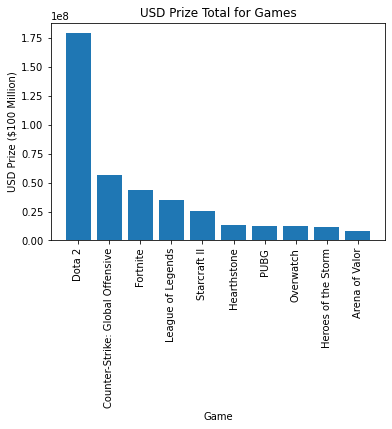

In [9]:
# Graphing Prize Total for Games
# plt.figure(figsize=(12, 4.8))
plt.bar(data_game["Game"],data_game["TotalUSDPrize"], align = "center")
plt.title("USD Prize Total for Games")
plt.ylabel("USD Prize ($100 Million)")
plt.xlabel("Game")
plt.xticks(rotation=90)
plt.savefig('../Figures/game_earnings.png', bbox_inches='tight')
plt.show()

In [10]:
# Group by Country
data_country = data.groupby("CountryCode")
data_country = data_country["TotalUSDPrize"].sum().reset_index().sort_values("TotalUSDPrize", ascending=False)
data_country.head()

,CountryCode,TotalUSDPrize
10,cn,72391878.56
29,kr,58441733.71
53,us,43099381.78
14,dk,26840800.02
45,se,20770423.01


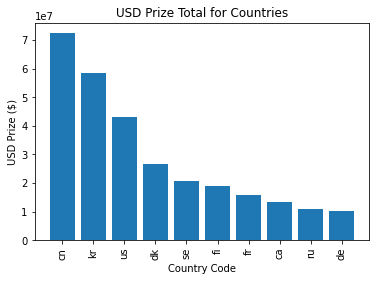

In [20]:
# Graph prize total for countries
plt.bar(data_country["CountryCode"][:10],data_country["TotalUSDPrize"][:10], align = "center")
plt.title("USD Prize Total for Countries")
plt.ylabel("USD Prize ($)")
plt.xlabel("Country Code")
plt.xticks(rotation=90)
plt.savefig('../Figures/country_earnings.png', bbox_inches='tight')
plt.show()

In [12]:
# Player earnings
player_earnings = data[["PlayerId", "NameFirst", "NameLast", "CurrentHandle", "Game", "TotalUSDPrize"]]
player_earnings = player_earnings.sort_values("PlayerId", ascending=True)
player_earnings

,PlayerId,NameFirst,NameLast,CurrentHandle,Game,TotalUSDPrize
511,1000,Min Chul,Jang,MC,Starcraft II,509771.79
530,1001,Jae Duk,Lim,NesTea,Starcraft II,288225.07
518,1002,Jong Hyun,Jung,Mvp,Starcraft II,404994.83
514,1003,Sung Hoon,Choi,Polt,Starcraft II,451943.24
542,1004,Jung Hoon,Lee,MarineKing,Starcraft II,212397.14
...,...,...,...,...,...,...
367,80697,Thomas,Davidsen,Th0masHD,Fortnite,188090.00
360,80698,Tai,Starčič,TaySon,Fortnite,200130.00
894,83083,Yu-Yan,Su,GaDuo,Arena of Valor,26666.67
895,83084,Tseng-Yung,Chun,Kato,Arena of Valor,26666.67


In [13]:
# Removing rows with incomplete names and splitting DataFrame
player_earnings = player_earnings[~player_earnings.NameFirst.str.contains("-")]
player_earnings = player_earnings
player_earnings = player_earnings[["PlayerId", "Game", "TotalUSDPrize"]]
player_earnings

,PlayerId,Game,TotalUSDPrize
511,1000,Starcraft II,509771.79
530,1001,Starcraft II,288225.07
518,1002,Starcraft II,404994.83
514,1003,Starcraft II,451943.24
542,1004,Starcraft II,212397.14
...,...,...,...
865,79579,Arena of Valor,44591.96
862,79580,Arena of Valor,46258.63
367,80697,Fortnite,188090.00
360,80698,Fortnite,200130.00


In [14]:
# Splitting DataFrame 
players = data[["PlayerId", "NameFirst", "NameLast", "CurrentHandle", "CountryCode", "Game"]]
players = players[~players.NameFirst.str.contains("-")]
players

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,Game
0,3883,Peter,Rasmussen,dupreeh,dk,Counter-Strike: Global Offensive
1,3679,Andreas,Højsleth,Xyp9x,dk,Counter-Strike: Global Offensive
2,3885,Nicolai,Reedtz,dev1ce,dk,Counter-Strike: Global Offensive
3,3672,Lukas,Rossander,gla1ve,dk,Counter-Strike: Global Offensive
4,17800,Emil,Reif,Magisk,dk,Counter-Strike: Global Offensive
...,...,...,...,...,...,...
995,7400,Janne,Mikkonen,Savjz,fi,Hearthstone
996,3255,Drew,Biessener,Tidesoftime,us,Hearthstone
997,49164,Simone,Liguori,Leta,it,Hearthstone
998,43043,Mike,Eichner,Ike,us,Hearthstone


# SQLALCHEMY

In [15]:
from password import password

ModuleNotFoundError: No module named 'password'

In [ ]:
# Connect to database
rds_connection_string = f"postgres:{password}@localhost:5432/esports_db"  ## Replace password in password.py ##
engine = create_engine(f'postgresql://{rds_connection_string}')

In [ ]:
player_earnings.to_sql(name='player_earnings', con=engine, if_exists='replace', index=False)

In [ ]:
players.to_sql(name='players', con=engine, if_exists='replace', index=False)

In [ ]:
data_country.to_sql(name='country_prize', con=engine, if_exists='replace', index=False)

In [ ]:
data_game.to_sql(name='game_prize', con=engine, if_exists='replace', index=False)

In [ ]:
pd.read_sql_query('select * from year_earnings', con=engine).head()